In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('dataset.csv')
print("Dataset loaded successfully")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully
Shape: (5000, 18)


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [3]:
# Check for null values
print("\nNull values:")
print(df.isnull().sum())


Null values:
AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [4]:
# Drop null values if any
df = df.dropna()

In [5]:
# Check for duplicates
print(f"\nDuplicate values: {df.duplicated().sum()}")


Duplicate values: 0


In [6]:
# Drop duplicates if any
df = df.drop_duplicates()

In [7]:
# Encode PULMONARY_DISEASE column (YES/NO to numeric)
le = LabelEncoder()
df['PULMONARY_DISEASE'] = le.fit_transform(df['PULMONARY_DISEASE'])

In [8]:
# Prepare features and target
X = df.drop(['PULMONARY_DISEASE'], axis=1)
y = df['PULMONARY_DISEASE']

In [9]:
print("\nData prepared")
print(f"Features: {X.shape}")
print(f"Target: {y.shape}")


Data prepared
Features: (5000, 17)
Target: (5000,)


In [10]:
# Split data into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 4000
Testing samples: 1000


In [12]:
# Create SVM model with linear kernel

model = SVC(kernel='linear', probability=True, random_state=42)

In [13]:
# Train the model
model.fit(X_train, y_train)
print("\nSVM Model trained successfully")


SVM Model trained successfully


In [14]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
print("\n" + "="*50)
print("SVM MODEL RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall:    {recall*100:.2f}%")
print(f"F1-Score:  {f1*100:.2f}%")


SVM MODEL RESULTS
Accuracy:  87.80%
Precision: 83.85%
Recall:    86.73%
F1-Score:  85.27%


In [17]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NO', 'YES']))


Classification Report:
              precision    recall  f1-score   support

          NO       0.91      0.89      0.90       593
         YES       0.84      0.87      0.85       407

    accuracy                           0.88      1000
   macro avg       0.87      0.88      0.87      1000
weighted avg       0.88      0.88      0.88      1000



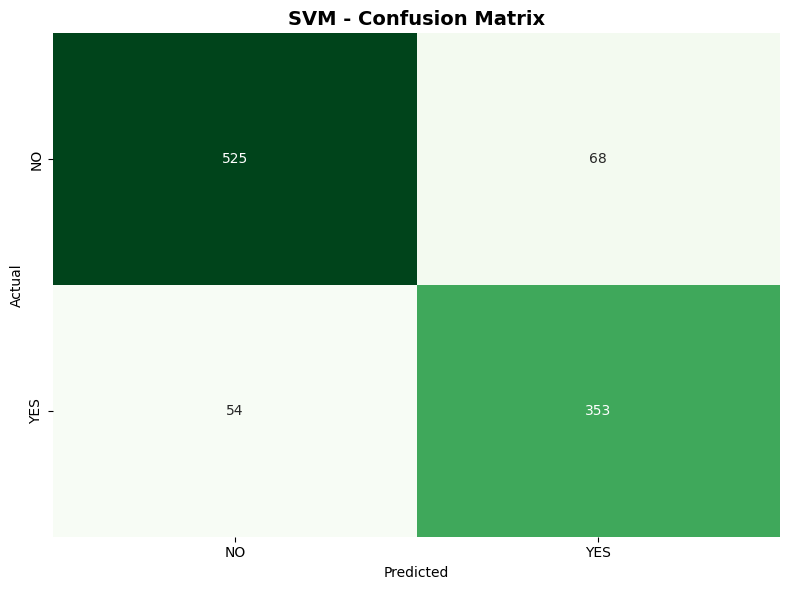

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png', dpi=300)
plt.show()

In [19]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

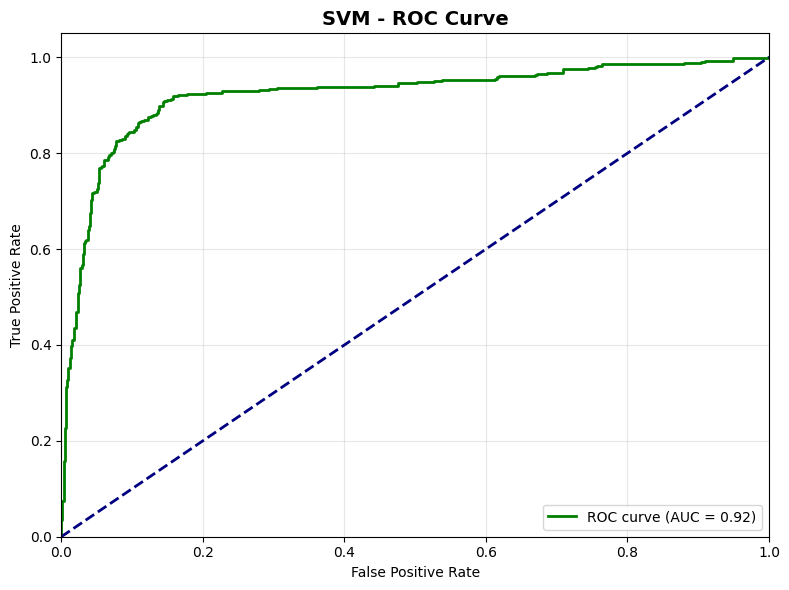

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('svm_roc_curve.png', dpi=300)
plt.show()

In [21]:
print(f"\nROC-AUC Score: {roc_auc:.4f}")
print("\n✓ SVM model evaluation completed!")
print("✓ Graphs saved: svm_confusion_matrix.png, svm_roc_curve.png")


ROC-AUC Score: 0.9223

✓ SVM model evaluation completed!
✓ Graphs saved: svm_confusion_matrix.png, svm_roc_curve.png
